# CS 7646: Machine Learning for Trading


In [1]:
import pandas as pd

In [2]:
data_dir = "../ML4T_2022Fall/data/"

## 01-01 Reading and plotting stock data

### Read CSV

In [3]:
def test_run():
    df = pd.read_csv(f"{data_dir}AAPL.csv")
    return df.head()

In [4]:
test_run()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-09-12,666.85,669.90,656.00,669.79,25410600,669.79
1,2012-09-11,665.11,670.10,656.50,660.59,17987400,660.59
2,2012-09-10,680.45,683.29,662.10,662.74,17428500,662.74
3,2012-09-07,678.05,682.48,675.77,680.44,11773800,680.44
4,2012-09-06,673.17,678.29,670.80,676.27,13971300,676.27


### Select rows

In [5]:
def test_run():
    df = pd.read_csv(f"{data_dir}AAPL.csv")
    return df[10:21]  # rows between index 10 and 20

In [6]:
test_run()

,Date,Open,High,Low,Close,Volume,Adj Close
10,2012-08-28,674.98,676.10,670.67,674.80,9550600,674.80
11,2012-08-27,679.99,680.87,673.54,675.68,15250300,675.68
12,2012-08-24,659.51,669.48,655.55,663.22,15619300,663.22
13,2012-08-23,666.11,669.90,661.15,662.63,15004600,662.63
14,2012-08-22,654.42,669.00,648.11,668.87,20190100,668.87
15,2012-08-21,670.82,674.88,650.33,656.06,29025700,656.06
16,2012-08-20,650.01,665.15,649.90,665.15,21906600,665.15
17,2012-08-17,640.00,648.19,638.81,648.11,15812900,648.11
18,2012-08-16,631.21,636.76,630.50,636.34,9090500,636.34
19,2012-08-15,631.30,634.00,627.75,630.83,9190800,630.83


### Compute max closing price

In [7]:
def get_max_close(symbol):
    """Return the maximum closing value for stock indicated by symbol.

    Note: Data for a stock is stored in file: data/<symbol>.csv
    """
    df = pd.read_csv("{}/{}.csv".format(data_dir, symbol))  # read in data
    return  df['Close'].max() # compute and return max

def test_run():
    """Function called by Test Run."""
    for symbol in ['AAPL', 'IBM']:
        print ("Max close")
        print (symbol, get_max_close(symbol))
        
test_run()

Max close
AAPL 680.44
Max close
IBM 209.5


### Compute mean volume

In [8]:
def get_mean_volume(symbol):
    """Return the mean volume for stock indicated by symbol.
    Note: Data for a stock is stored in file: data/<symbol>.csv
    """
    df = pd.read_csv("{}/{}.csv".format(data_dir, symbol))  # read in data
    # Quiz: Compute and return the mean volume for this stock
    return df['Volume'].mean()
   
def test_run():
    """Function called by Test Run."""
    for symbol in ['AAPL', 'IBM']:
        print ("Mean Volume")
        print (symbol, get_mean_volume(symbol))
        
test_run()

Mean Volume
AAPL 21491431.338582676
Mean Volume
IBM 7103570.803149606


### Plotting stock price data

In [9]:
import matplotlib.pyplot as plt

0       669.79
1       660.59
2       662.74
3       680.44
4       676.27
         ...  
3170     28.39
3171     26.88
3172     25.72
3173     24.60
3174     24.96
Name: Adj Close, Length: 3175, dtype: float64


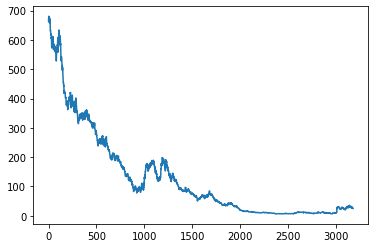

In [10]:
def test_run():
    df = pd.read_csv(f"{data_dir}/AAPL.csv")
    print(df['Adj Close'])
    df['Adj Close'].plot()
    plt.show() # must be called to show plots
    
test_run()

### Plot High prices for IBM

0       204.65
1       203.46
2       201.82
3       199.50
4       199.46
         ...  
3170    116.87
3171    118.44
3172    117.50
3173    115.81
3174    113.44
Name: High, Length: 3175, dtype: float64


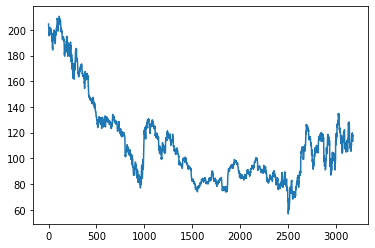

In [11]:
def test_run():
    df = pd.read_csv(f"{data_dir}/IBM.csv")
    print(df['High'])
    df['High'].plot()
    plt.show()
    
test_run()

### Plot two columns

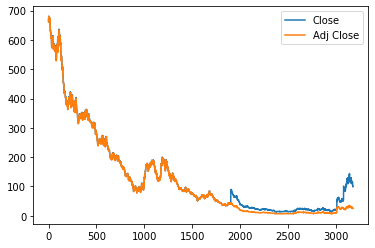

In [12]:
def test_run():
    df = pd.read_csv(f"{data_dir}/AAPL.csv")
    df[['Close', 'Adj Close']].plot()
    plt.show()
    
test_run()

## 01-02 Working with multiple stocks

### Create an empty DataFrame

In [13]:
def test_run():
    # Define date ranges
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date, end_date)
    
    # Create an empty DataFrame
    df1 = pd.DataFrame(index=dates)
    
    return df1

test_run()

""
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26


### Join SPY data

In [14]:
def test_run():
    # Define date ranges
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date, end_date)
    
    # Create an empty DataFrame
    df1 = pd.DataFrame(index=dates)
    
    # Read SPY data into temporary DataFrame
    dfSPY = pd.read_csv(f"{data_dir}SPY.csv",
                        index_col='Date',
                        parse_dates=True,
                        usecols=['Date', 'Adj Close'],
                        na_values=['nan'])
    
    # Join the two DataFrames using DataFrame.join()
    df1 = df1.join(dfSPY, how='inner')  # default how='left'
    
    return df1

test_run()

,Adj Close
2010-01-22,104.34
2010-01-25,104.87
2010-01-26,104.43


### Read in more stocks

In [15]:
# How many days were U.S. stocks traded at NYSE in 2014
def test_run():
    # Define date ranges
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates = pd.date_range(start_date, end_date)
    
    # Create an empty DataFrame
    df1 = pd.DataFrame(index=dates)
    
    # Read SPY data into temporary DataFrame
    dfSPY = pd.read_csv(f"{data_dir}SPY.csv",
                        index_col='Date',
                        parse_dates=True,
                        usecols=['Date', 'Adj Close'],
                        na_values=['nan'])
    
    # Join the two DataFrames using DataFrame.join()
    df1 = df1.join(dfSPY, how='inner')  # default how='left'
    
    # Load more stocks
    symbols = ['GOOG', 'IBM', 'GLD']
    for stock in symbols:
        df_temp = pd.read_csv(f"{data_dir}/{stock}.csv",
                              index_col='Date',
                              parse_dates=True,
                              usecols=['Date', 'Adj Close'],
                              na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': stock})
        df1 = df1.join(df_temp)  # use default how='left'
        
    return df1
    
test_run()

,Adj Close,GOOG,IBM,GLD
2010-01-22,104.34,550.01,119.61,107.17
2010-01-25,104.87,540.00,120.20,107.48
2010-01-26,104.43,542.42,119.85,107.56


### Utility functions

In [16]:
import os

In [17]:
def symbol_to_path(symbol, base_dir=data_dir):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, f"{str(symbol)}.csv")


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    
    for symbol in symbols:
        df_temp = pd.read_csv(f"{symbol_to_path(symbol)}",
                              index_col='Date',
                              parse_dates=True,
                              usecols=['Date', 'Adj Close'],
                              na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)  # use default how='left'
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
        
    return df


def test_run():
    # Define a data range
    dates = pd.date_range('2010-01-22', '2010-01-26')
    
    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']
    
    # Get stock data
    df = get_data(symbols=symbols, dates=dates)
    return df

test_run()

,SPY,GOOG,IBM,GLD
2010-01-22,104.34,550.01,119.61,107.17
2010-01-25,104.87,540.00,120.20,107.48
2010-01-26,104.43,542.42,119.85,107.56


### Slicing

In [18]:
def test_run():
    # Define a data range
    dates = pd.date_range('2010-01-01', '2010-12-31') # year 2010
    
    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols=symbols, dates=dates)
    
    # Slice by row range (dates) using DataFrame.ix[] selector
    return df.loc['2010-01-01':'2010-01-31']  # month of January

df = test_run()
df

,SPY,GOOG,IBM,GLD
2010-01-04,108.27,626.75,126.24,109.80
2010-01-05,108.56,623.99,124.71,109.70
2010-01-06,108.64,608.26,123.90,111.51
2010-01-07,109.10,594.10,123.47,110.82
2010-01-08,109.46,602.02,124.71,111.37
2010-01-11,109.61,601.11,123.41,112.85
2010-01-12,108.59,590.48,124.39,110.49
2010-01-13,109.51,587.09,124.12,111.54
2010-01-14,109.80,589.85,126.10,112.03
2010-01-15,108.57,580.00,125.60,110.86


In [19]:
# Slice by column
df['GOOG'].head()  # a single label selects a single column

2010-01-04    626.75
2010-01-05    623.99
2010-01-06    608.26
2010-01-07    594.10
2010-01-08    602.02
Name: GOOG, dtype: float64

In [20]:
df[['IBM', 'GLD']].head()  # a list of labels selects multiple columns

,IBM,GLD
2010-01-04,126.24,109.80
2010-01-05,124.71,109.70
2010-01-06,123.90,111.51
2010-01-07,123.47,110.82
2010-01-08,124.71,111.37


In [21]:
# Slice by row and column
df.loc['2010-01-01':'2010-01-31', ['SPY', 'IBM']]  # month of January

,SPY,IBM
2010-01-04,108.27,126.24
2010-01-05,108.56,124.71
2010-01-06,108.64,123.90
2010-01-07,109.10,123.47
2010-01-08,109.46,124.71
2010-01-11,109.61,123.41
2010-01-12,108.59,124.39
2010-01-13,109.51,124.12
2010-01-14,109.80,126.10
2010-01-15,108.57,125.60


### Plotting multiple stocks

In [22]:
# Reset DataFrame
def reset_df():
    dates = pd.date_range('2010-01-01', '2010-12-31') # year 2010
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    df = get_data(symbols=symbols, dates=dates)
    return df

df = reset_df()

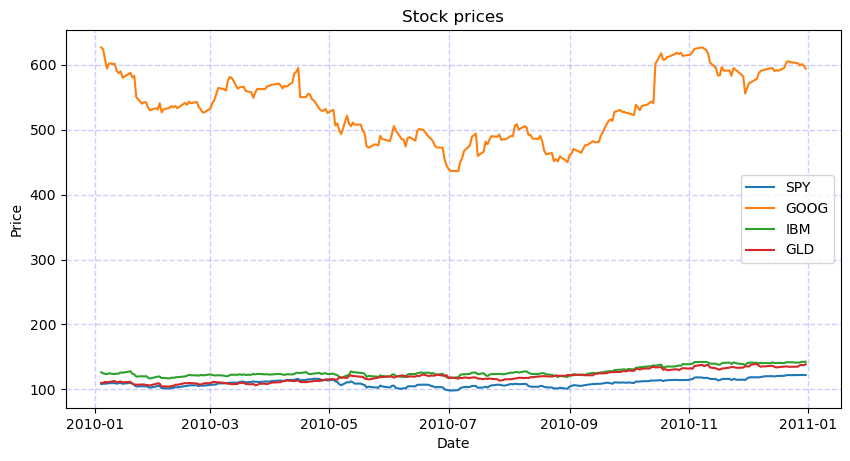

In [23]:
def plot_data(df, title='Stock prices'):
    """Plot stock prices"""
    fig = plt.figure(figsize=(10,5), dpi=100)
    ax = fig.add_subplot()
    ax.plot(df)
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(df)
    plt.show()
    
plot_data(df)

### Slice and plot two stocks

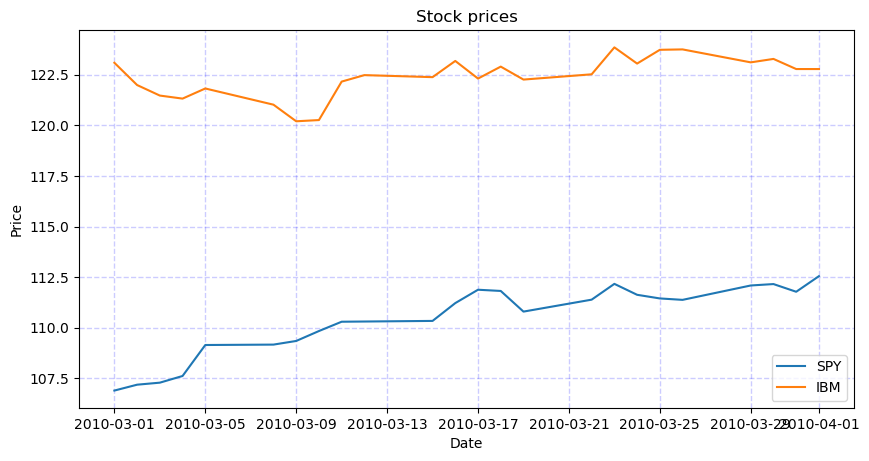

In [24]:
def plot_selected(df, columns, start_index, end_index):
    """PLot the desired columns over index values in the given range."""
    # Filter columns
    df = df[columns]
    
    # Slice by row range
    df = df[start_index:end_index]
    
    # Plot stock data
    fig = plt.figure(figsize=(10,5), dpi=100)
    ax = fig.add_subplot()
    ax.plot(df)
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.title("Stock prices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(df)
    plt.show()


def test_run():
    # Define a data range
    dates = pd.date_range('2010-01-01', '2010-12-31') # year 2010
    
    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols=symbols, dates=dates)
    
    # Slice and plot
    plot = plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')
    return plot

test_run()

### Normalizing

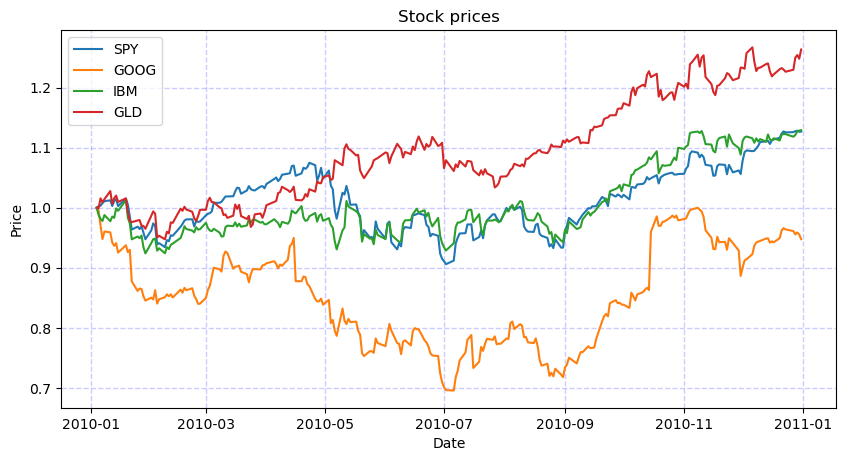

In [25]:
def normalize_data(df):
    """Normalize stock prices using the first row of the DataFrame."""
    return df/df.iloc[0,:]

# Reset DataFrame
df = reset_df()
norm_df = normalize_data(df)
plot_data(norm_df)

## 01-03 The power of NumPy
NumPy is a library designed for numeric computation that is warpped around underlying C code. This makes NumPy very fast. NumPy focuses on matrices, called arrays.

Notation:
- array[row, column]
- array[0, 0]  # row 0, column 0
- array[3, 2]  # row 3, column 2

In [26]:
import numpy as np

In [27]:
# Create a 5x5 matrix
np.random.seed(42)  # seed for reproducibility
matrix = np.random.randint(1,10, (5,5))
matrix

array([[7, 4, 8, 5, 7],
       [3, 7, 8, 5, 4],
       [8, 8, 3, 6, 5],
       [2, 8, 6, 2, 5],
       [1, 6, 9, 1, 3]])

In [28]:
print(f"1. matrix[0,0]: {matrix[0,0]}")
print(f"2. matrix[3,2]: {matrix[3,2]}")
print(f"3. matrix[0:3, 1:3]:\n{matrix[0:3,1:3]}")
print(f"4. matrix[:, 3]: {matrix[:,3]}")
print(f"5. matrix[-1, 1:3]: {matrix[-1, 1:3]}")

1. matrix[0,0]: 7
2. matrix[3,2]: 6
3. matrix[0:3, 1:3]:
[[4 8]
 [7 8]
 [8 3]]
4. matrix[:, 3]: [5 5 6 2 1]
5. matrix[-1, 1:3]: [6 9]


### Replace a slice

In [29]:
nd1 = np.random.randint(1, 10, (4,4))
nd2 = np.random.randint(1, 10, (4,4))
print(f"nd1:\n{nd1}\n\nnd2:\n{nd2}\n")

# Replace nd1[0:2, 0:2] with nd2[-2:, 2:4]
nd1[0:2, 0:2] = nd2[-2:, 2:4]
print(f"Replaced nd1:\n{nd1}")

nd1:
[[7 4 9 3]
 [5 3 7 5]
 [9 7 2 4]
 [9 2 9 5]]

nd2:
[[2 4 7 8]
 [3 1 4 2]
 [8 4 2 6]
 [6 4 6 2]]

Replaced nd1:
[[2 6 9 3]
 [6 2 7 5]
 [9 7 2 4]
 [9 2 9 5]]


### Creating NumPy arrays

In [30]:
def test_run():
    # 1D and 2D arrays
    nd1 = np.array([2, 3, 4])
    nd2 = np.array([[2, 3, 4], [5, 6, 7]])
    return nd1, nd2


nd1, nd2 = test_run()
print(f"1D array: {nd1}")
print(f"2D array:\n{nd2}")

1D array: [2 3 4]
2D array:
[[2 3 4]
 [5 6 7]]


### Arrays with initial values

In [31]:
def test_run():
    # Zero array
    nd1 = np.empty(5)
    nd2 = np.empty([5,4])
    nd3 = np.empty([5,4,3])
    return nd1, nd2, nd3


nd1, nd2, nd3 = test_run()
print(f"1D array: {nd1}")
print(f"2D array:\n{nd2}")
print(f"3D array:\n{nd3}")

1D array: [ 0.         20.94444444 41.88888889 62.83333333 83.77777778]
2D array:
[[0.  0.  0.3 1. ]
 [0.  0.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  0.  0.  1. ]
 [0.5 0.  0.  1. ]]
3D array:
[[[0. 0. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[0. 0. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[0. 0. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[0. 0. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[0. 0. 0.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]


In [32]:
def test_run():
    # Array of 1s
    return np.ones([5,4])


test_run()

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

### Specify the datatype

In [33]:
def test_run():
    # Array of 1s
    return np.ones([5,4], dtype=np.int_)  # dtype=int


test_run()

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

### Generate random numbers

In [34]:
def test_run():
    # Generate an array full of random numbers, uniformly sampled from [0.0, 1.0]
    nd1 = np.random.randn(5,4)
    
    # Array of Normal distribution
    nd2 = np.random.normal(size=(2,3))  # zero mean, 1 standard deviation
    nd3 = np.random.normal(50, 10, size=(2,3))  # 50 mean, 10 s.d.
    
    return nd1, nd2, nd3


nd1, nd2, nd3 = test_run()
print(f"Random numbers uniformly sampled:\n{nd1}\n")
print(f"Random numbers from normal distribution:\n{nd2}\n")
print(f"Random numbers from normal distribution with 50 meand and 10 standard deviation:\n{nd3}")

Random numbers uniformly sampled:
[[ 0.21863832  0.88176104 -1.00908534 -1.58329421]
 [ 0.77370042 -0.53814166 -1.3466781  -0.88059127]
 [-1.1305523   0.13442888  0.58212279  0.88774846]
 [ 0.89433233  0.7549978  -0.20716589 -0.62347739]
 [-1.50815329  1.09964698 -0.17773212 -0.41038331]]

Random numbers from normal distribution:
[[ 1.17971634 -0.89820794  0.83479542]
 [ 0.29656138 -1.03782988 -0.07580375]]

Random numbers from normal distribution with 50 meand and 10 standard deviation:
[[59.72963534 57.95595464 64.95434253]
 [53.38181252 83.72296254 40.79609195]]


In [35]:
# Random integers
def test_run():
    print(f"Single integer: {np.random.randint(10)}")  # a single integer in [0,10]
    print(f"Single integer: {np.random.randint(0, 10)}")  # same as above, specifying [low, high] explicitly
    print(f"1D array: {np.random.randint(0, 19, size=5)}")  # 5 random integers as a 1D array
    print(f"2D array:\n{np.random.randint(0, 10, size=(2,3))}")  # 2x3 matrix of random integers
    
    
test_run()

Single integer: 9
Single integer: 9
1D array: [12 18  6 16  3]
2D array:
[[4 6 6]
 [3 6 2]]


### Array attributes

In [36]:
def test_run():
    A = np.random.randn(5,4)  # 5x4 matrix of random numbers
    shape = A.shape  # shape of matrix
    size = A.size  # number of elements in the matrix
    datatype = A.dtype  # datatype of matrix
    
    # Print array attributes
    print(f"Matrix:\n{np.round(A,2)}\n")
    print(f"Shape of matrix: {shape}")
    print(f"Size of matrix: {size}")
    print(f"DataType of matrix: {datatype}")

    
test_run()

Matrix:
[[ 0.5   1.16  0.26  0.31]
 [ 1.37  0.18 -0.31  0.67]
 [-0.26 -0.37  1.27 -0.29]
 [-2.66  0.35 -0.4  -0.29]
 [ 0.45 -0.17  0.21 -2.02]]

Shape of matrix: (5, 4)
Size of matrix: 20
DataType of matrix: float64


### Operations on ndarrays

In [37]:
def test_run():
    np.random.seed(1)  # random seed used to reproduce numbers  
    A = np.random.randint(0, 10, size=(5,4)) # 5x4 matrix of random integers in [0, 10]
    print(f"Matrix:\n{A}\n")
    
    # Sum of all elements
    sumA = np.sum(A)
    print(f"Sum of all elements in matrix: {sumA}")
    
    # Iterate over rows, to compute sum of each column
    rowSum = np.sum(A, axis=0)
    print(f"Sum of each column: {rowSum}")
    
    # Iterate over columns, to compute sum of each row
    colSum = np.sum(A, axis=1)
    print(f"Sum of each row: {colSum}")
    
test_run()

Matrix:
[[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]
 [5 2 4 2]
 [4 7 7 9]]

Sum of all elements in matrix: 96
Sum of each column: [20 26 23 27]
Sum of each row: [27  8 21 13 27]


In [38]:
def test_run():
    np.random.seed(1)  # random seed used to reproduce numbers
    A = np.random.randint(0, 10, size=(5,4)) # 5x4 matrix of random integers in [0, 10]
    print(f"Matrix:\n{A}\n")
    
    # Statistics: min, max, mean (across rows, cols, and overall)
    minCol = np.min(A, axis=0)
    maxRow = np.max(A, axis=1)
    mean_A = np.mean(A)
    print(f"Minimum of each column: {minCol}")
    print(f"Maximum of each row: {maxRow}")
    print(f"Mean of all elements: {mean_A}")
    
test_run()

Matrix:
[[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]
 [5 2 4 2]
 [4 7 7 9]]

Minimum of each column: [0 0 1 2]
Maximum of each row: [9 7 9 5 9]
Mean of all elements: 4.8


### Locate maximum value

In [39]:
def get_max_index(array):
    """Return the index of the maximum value in given 1D array"""
    maxVal = np.max(array)
    return maxVal, np.argmax(array)

def test_run():
    A = np.array([9, 6, 2, 3, 12, 14, 7, 10], dtype=np.int32) # 32-bit integer array
    print(f"Matrix: {A}")
    
    # Find the maximum and its index in array
    maxVal, idx = get_max_index(array=A)
    print(f"Maximum value: {maxVal}")
    print(f"Index of max value: {idx}")
    
test_run()

Matrix: [ 9  6  2  3 12 14  7 10]
Maximum value: 14
Index of max value: 5


### Timing python operations

In [40]:
import time

In [41]:
def test_run():
    t1 = time.time()
    print('ML4T')
    t2 = time.time()
    print(f"The time taken to print the statement is {t2-t1} seconds.")
    
test_run()

ML4T
The time taken to print the statement is 0.0 seconds.


### How fast is NumPy?

In [42]:
def manual_mean(arr):
    """Compute mean (average) of all elements in the given 2D array."""
    summ = 0
    for i in range(0, arr.shape[0]):
        for j in range(0, arr.shape[1]):
            summ += arr[i][j]
    return summ / arr.size
    
def numpy_mean(arr):
    """Compute mean (average) using NumPy."""
    return np.mean(arr)

def how_long(func, *args):
    """Comptue how long it takes to perform computations."""
    t1 = time.time()
    mean = func(*args)
    t2 = time.time()
    total_time = t2 - t1
    return mean, total_time


def test_run():
    nd1 = 20*np.random.randn(1000, 10000) # create a large matrix
    
    # Time the two functions, retrieving results and execution times
    res_manual, t_manual = how_long(manual_mean, nd1)
    res_numpy, t_numpy = how_long(numpy_mean, nd1)
    print(f"Manual {np.round(res_manual, 3)} ({np.round(t_manual, 3)} secs.) vs.",
          f"NumPy {np.round(res_numpy, 3)} ({np.round(t_numpy, 3)}) secs.")
    
    # Make sure both give us the same answer (up to some precision)
    assert abs(res_manual - res_numpy) <= 10e-6, "Results are't equal!"
    
    # Compute speedup
    speedup = t_manual / t_numpy
    print(f"NumPy mean is {np.round(speedup, 2)} times faster than manual for loops.")
    
test_run()

Manual -0.008 (2.988 secs.) vs. NumPy -0.008 (0.013) secs.
NumPy mean is 230.58 times faster than manual for loops.


### Accessing array elements

In [43]:
def test_run():
    np.random.seed(1)
    A = np.random.randint(0, 10, size=(4,4))
    print(f"Matrix:\n{A}\n")
    
    # Accessing element at position (3,2)
    elem = A[3, 2]
    print(f"Element at position (3,2): {elem}")
    
    # Elements in defined range
    elemRng = A[0, 1:3]
    print(f"Elements in defined range: {elemRng}")
    
    # Top-left corner
    left = A[0:2, 0:2]
    print(f"Top-left corner:\n{left}")
    
    # Slicing
    # Note: Slice n:m:t specifies a range that starts at n, and stops before m, in t steps
    cols = A[:, 0:3:2]
    print(f"Columns 0, 2 for every row:\n{cols}")

test_run()

Matrix:
[[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]
 [5 2 4 2]]

Element at position (3,2): 4
Elements in defined range: [8 9]
Top-left corner:
[[5 8]
 [0 0]]
Columns 0, 2 for every row:
[[5 9]
 [0 1]
 [6 2]
 [5 4]]


### Modifying array elements

In [44]:
def test_run():
    np.random.seed(1)
    A = np.random.randint(0, 10, size=(4,4))
    print(f"Matrix:\n{A}\n")
    
    # Assigning a single value to an entire row
    rowA = A.copy()
    rowA[0, :] = 2
    print(f"Modified (replaced first row with a single value):\n{rowA}\n")
    
    # Assigning a list to a column in an array
    colA = A.copy()
    colA[:, 3] = [71, 72, 73, 74]
    print(f"Modified (replaced fourth column with a list):\n{colA}")
    
test_run()

Matrix:
[[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]
 [5 2 4 2]]

Modified (replaced first row with a single value):
[[2 2 2 2]
 [0 0 1 7]
 [6 9 2 4]
 [5 2 4 2]]

Modified (replaced fourth column with a list):
[[ 5  8  9 71]
 [ 0  0  1 72]
 [ 6  9  2 73]
 [ 5  2  4 74]]


### Indexing and array with another array

In [45]:
def test_run():
    np.random.seed(1)
    A = np.random.randint(0, 10, size=(4,4))
    print(f"Matrix:\n{A}\n")
    
    # Accessing rows using list of indices
    indices = np.array([1,1,2,3])
    print(f"Indices:\n{A[indices]}")
    
test_run()

Matrix:
[[5 8 9 5]
 [0 0 1 7]
 [6 9 2 4]
 [5 2 4 2]]

Indices:
[[0 0 1 7]
 [0 0 1 7]
 [6 9 2 4]
 [5 2 4 2]]


### Boolean or "mask" index arrays

In [46]:
def test_run():
    A = np.array([[20, 25, 10, 23, 26, 32, 10, 5, 0], [0, 2, 50, 20, 0, 1, 28, 5, 0]])
    print(f"Matrix:\n{A}\n")
    
    # Compute mean
    mean = np.mean(A)
    print(f"Mean: {np.round(mean, 3)}")
    
    # Masking
    print(f"Masking: {A[A<mean]}")
    
    # Masking
    A[A<mean] = mean
    print(f"Modified matrix using masking:\n{A}\n")
    
test_run()

Matrix:
[[20 25 10 23 26 32 10  5  0]
 [ 0  2 50 20  0  1 28  5  0]]

Mean: 14.278
Masking: [10 10  5  0  0  2  0  1  5  0]
Modified matrix using masking:
[[20 25 14 23 26 32 14 14 14]
 [14 14 50 20 14 14 28 14 14]]



### Arithmetic operations

In [47]:
def test_run():
    A = np.array([[1,2,3,4,5], [10,20,30,40,50]])
    print(f"Matrix A:\n{A}\n")
    
    # Divide matrix A by 2
    div = A/2
    print(f"Matrix A divided by 2:\n{div}\n")
    
    # Create matrix B
    B = np.array([[100,200,300,400,500], [1,2,3,4,5]])
    print(f"Matrix B:\n{B}\n")
    
    # Add two matrices
    add = A + B
    print(f"A + B:\n{add}\n")
    
    # Divide A by B
    div = A / B
    print(f"A / B:\n{div}\n")
    
    # Multiply A and B
    mult = A * B
    print(f"A * B:\n{mult}\n")
    
    # Matrix multiplication
    dotAT = A.T @ B # result will be a 5x5 matrix
    dotBT = A @ B.T # result will be a 2x2 matrix
    print(f"A.T@B:\n{dotAT}\n")
    print(f"A@B.T:\n{dotBT}")
    
    
test_run()

Matrix A:
[[ 1  2  3  4  5]
 [10 20 30 40 50]]

Matrix A divided by 2:
[[ 0.5  1.   1.5  2.   2.5]
 [ 5.  10.  15.  20.  25. ]]

Matrix B:
[[100 200 300 400 500]
 [  1   2   3   4   5]]

A + B:
[[101 202 303 404 505]
 [ 11  22  33  44  55]]

A / B:
[[ 0.01  0.01  0.01  0.01  0.01]
 [10.   10.   10.   10.   10.  ]]

A * B:
[[ 100  400  900 1600 2500]
 [  10   40   90  160  250]]

A.T@B:
[[ 110  220  330  440  550]
 [ 220  440  660  880 1100]
 [ 330  660  990 1320 1650]
 [ 440  880 1320 1760 2200]
 [ 550 1100 1650 2200 2750]]

A@B.T:
[[ 5500    55]
 [55000   550]]


## 01-04 Statistical analysis of time series

### Compute global statistics

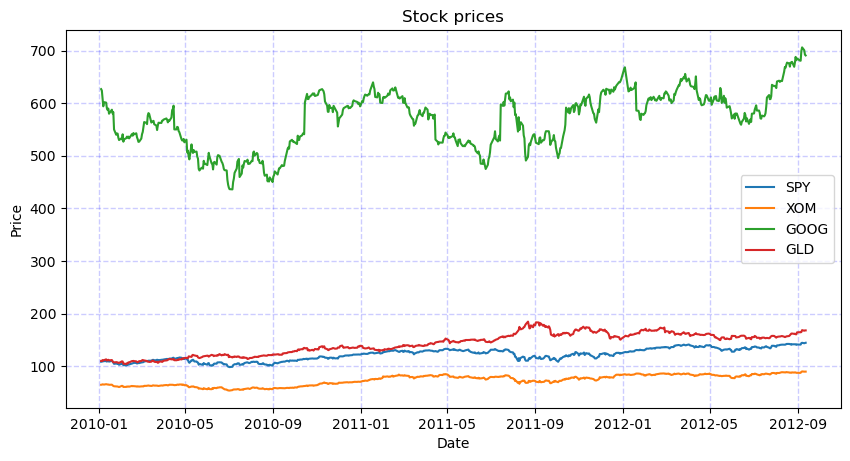

Stock mean prices:
SPY     121.711206
XOM      73.296221
GOOG    568.941941
GLD     142.603279
dtype: float64

Stock mean prices:
SPY     123.305
XOM      76.440
GOOG    578.845
GLD     146.440
dtype: float64

Stock mean prices:
SPY     11.626556
XOM     10.168104
GOOG    54.068129
GLD     20.562938
dtype: float64



In [48]:
def test_run():
    # Read data
    dates = pd.date_range('2010-01-01', '2012-12-31')
    symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute global statistics for each stock
    mean = df.mean()
    median = df.median()
    std = df.std()
    
    print(f"Stock mean prices:\n{mean}\n")
    print(f"Stock mean prices:\n{median}\n")
    print(f"Stock mean prices:\n{std}\n")

    
test_run()

### Computing rolling statistics

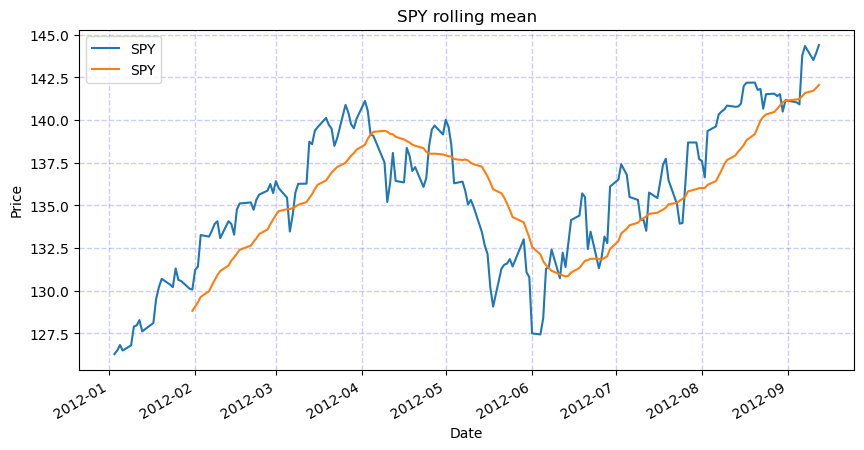

In [49]:
def plot_selected(df, columns, start_index, end_index):
    """PLot the desired columns over index values in the given range."""
    # Filter columns
    df = df[columns]
    
    # Slice by row range
    df = df[start_index:end_index]
    
    # Plot stock data
    fig = plt.figure(figsize=(10,5), dpi=100)
    ax = fig.add_subplot()
    ax.plot(df)
    plt.title("Stock prices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(df)
    plt.show()

def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    
    # Plot SPY data, retain matplotlib axis object
    fig = plt.figure(figsize=(10,5), dpi=100)
    ax = df['SPY'].plot(title='SPY rolling mean', label='SPY')
    
    # Compute rolling mean using a 20-day window
    rmSPY = df.rolling(window=20).mean()
    
    # Add rolling mean to the same plot
    rmSPY.plot(label='Rolling mean', ax=ax)
    
    # Add axis labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.show()
    
    
test_run()

### Compute Bollinger Bands

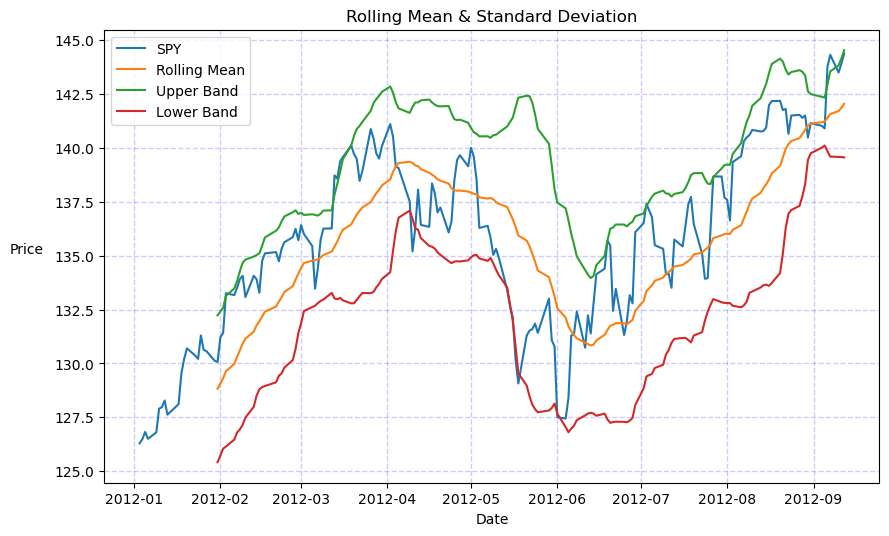

In [50]:
def get_rolling_mean(df, window):
    """Return rolling mean of given values, using specified window size."""
    rm = df.rolling(window=window).mean()
    return rm

def get_rolling_std(df, window):
    """Return rolling standard deviation of given values, using specified window size."""
    rstd = df.rolling(window=window).std()
    return rstd

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + (rstd * 2)
    lower_band = rm - (rstd * 2)
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    
    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df=df['SPY'], window=20)
    
    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df=df['SPY'], window=20)
    
    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot SPY data, retain matplotlib axis object
    plt.figure(figsize=(10,6), dpi=100)
    ax = plt.plot(df, label='SPY')
    rm_plt = plt.plot(rm_SPY, label='Rolling Mean')
    upper = plt.plot(upper_band, label='Upper Band')
    lower = plt.plot(lower_band, label='Lower Band')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel("Date")
    plt.ylabel("Price", rotation=0, labelpad=20)
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.legend(loc="best")
    # plt.show(block=False)
    plt.show()
    
test_run()

### Compute daily returns

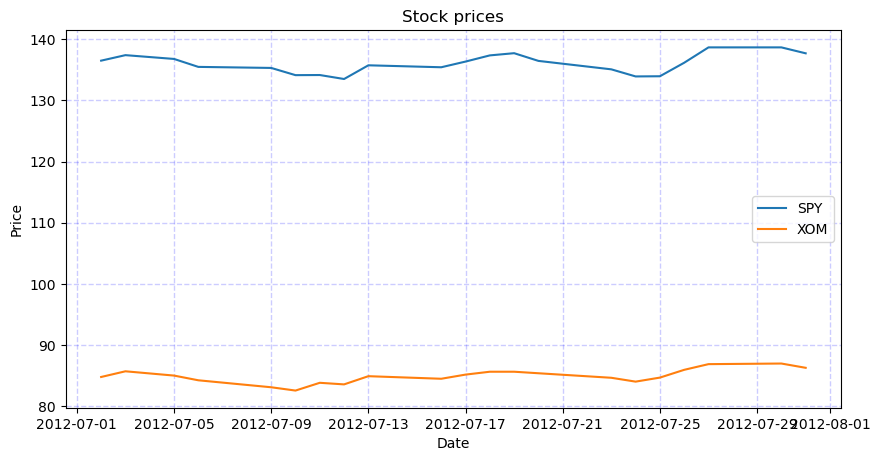

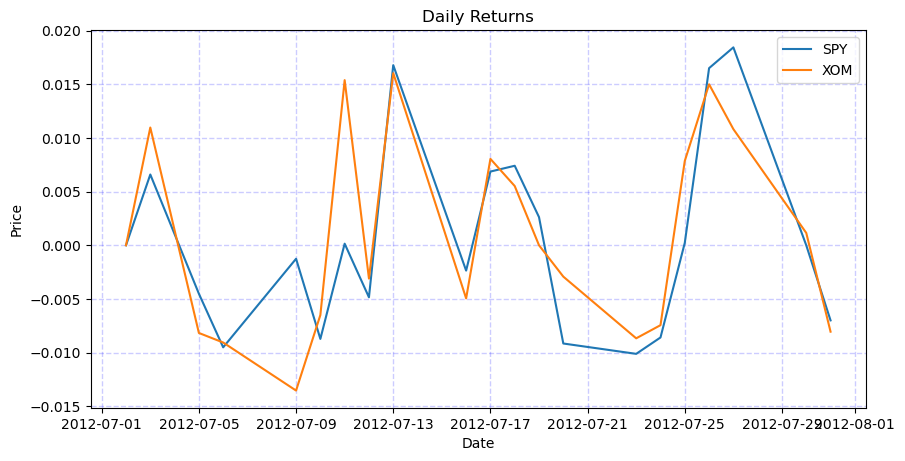

In [51]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    
    # Compute daily returns for row 1 onwards
    # daily_returns[1:] = (df[1:]/df[:-1].values) - 1
    daily_returns = (df / df.shift(1)) - 1
    daily_returns.iloc[0,:] = 0 # set daily returns for row 0 to 0
    return daily_returns

def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')
    symbols = ['SPY', 'XOM']
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title='Daily Returns')
    
    
test_run()

### Cumulative returns

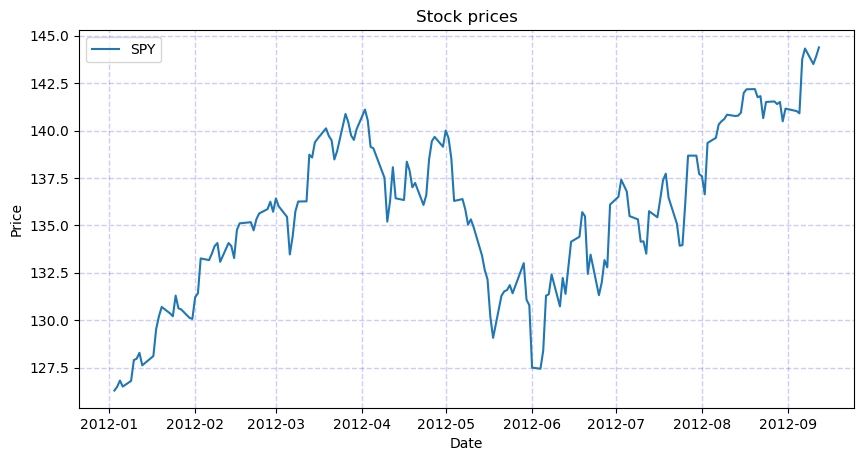

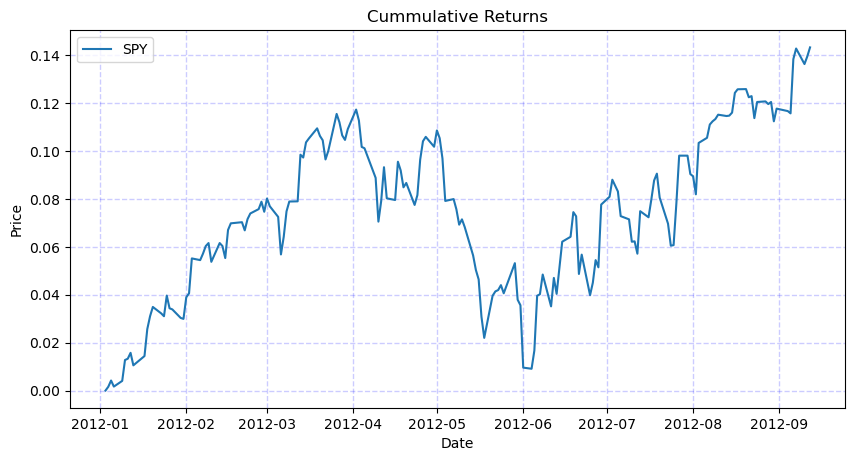

TypeError: scatter() missing 1 required positional argument: 'y'

In [55]:
def compute_cummulative_returns(df):
    """Compute and return the daily return values."""
    cummm_returns = df.copy()
    
    # Compute cummulative returns for entire month
    cummm_returns = (df / df.iloc[0]) - 1
    cummm_returns.iloc[0,:] = 0 # set daily returns for row 0 to 0
    return cummm_returns

def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute cummulative returns
    cumm_returns = compute_cummulative_returns(df)
    plot_data(cumm_returns, title='Cummulative Returns')
    plt.scatter(cumm_returns.iloc[-1])
    
test_run()

In [60]:
# Read data
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)
# plot_data(df)
cumm_returns = compute_cummulative_returns(df)

In [64]:
cumm_returns

,SPY
2012-01-03,0.000000
2012-01-04,0.001584
2012-01-05,0.004197
2012-01-06,0.001663
2012-01-09,0.004038
...,...
2012-09-06,0.138412
2012-09-07,0.142846
2012-09-10,0.136353
2012-09-11,0.139520
